Import and duplication of data for later use

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/spotify_songs (1).csv')
df1= df.copy()
df2= df.copy()#use df2 for ML predictions
df3 = df.copy()#use for feature engineering to improve the accuracy

Statistical description and type of each feature

In [ ]:
print(df.describe())

print(df.dtypes)

print(df.columns)

df.head()

# Track popularity is pre-normalized to fit range of song listens (0-100)
# With higher meaning better

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Exploration of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

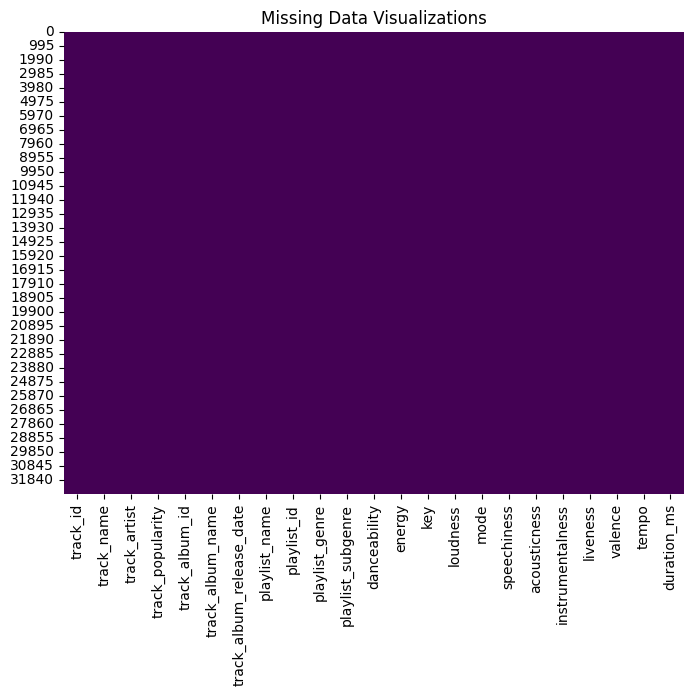

In [ ]:
# Length of our data (32833 total songs)
df.shape[0]

# There are no null values in our data
df.info()

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualizations')
plt.show()

Exploration of duplicates

In [ ]:
# Number of unique values per feature
print(df.nunique())

# The number of unique track ids and names do not add up to the total length
# Therefore it appears that there are multiple entries of the same song
# Total of 28356 unique track ids

# However, there are no rows that are exactly identical to another
duplicates = len(df)-len(df.drop_duplicates())
print("The number of duplicate rows is equal to " + str(duplicates))

# To avoid multiple "reviews" of the same song, we can average their stats
df = df.groupby('track_id').mean().reset_index()
# There are more unique track_id values than track_name, so we will
# average across track_id

# Length of data
df.shape[0]
# As expected, our data is equal in length to the number of unique track ids

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64
The number of duplicate rows is equal to 0


<ipython-input-5-5d41290afe4a>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('track_id').mean().reset_index()


28356

Exploration of distribution

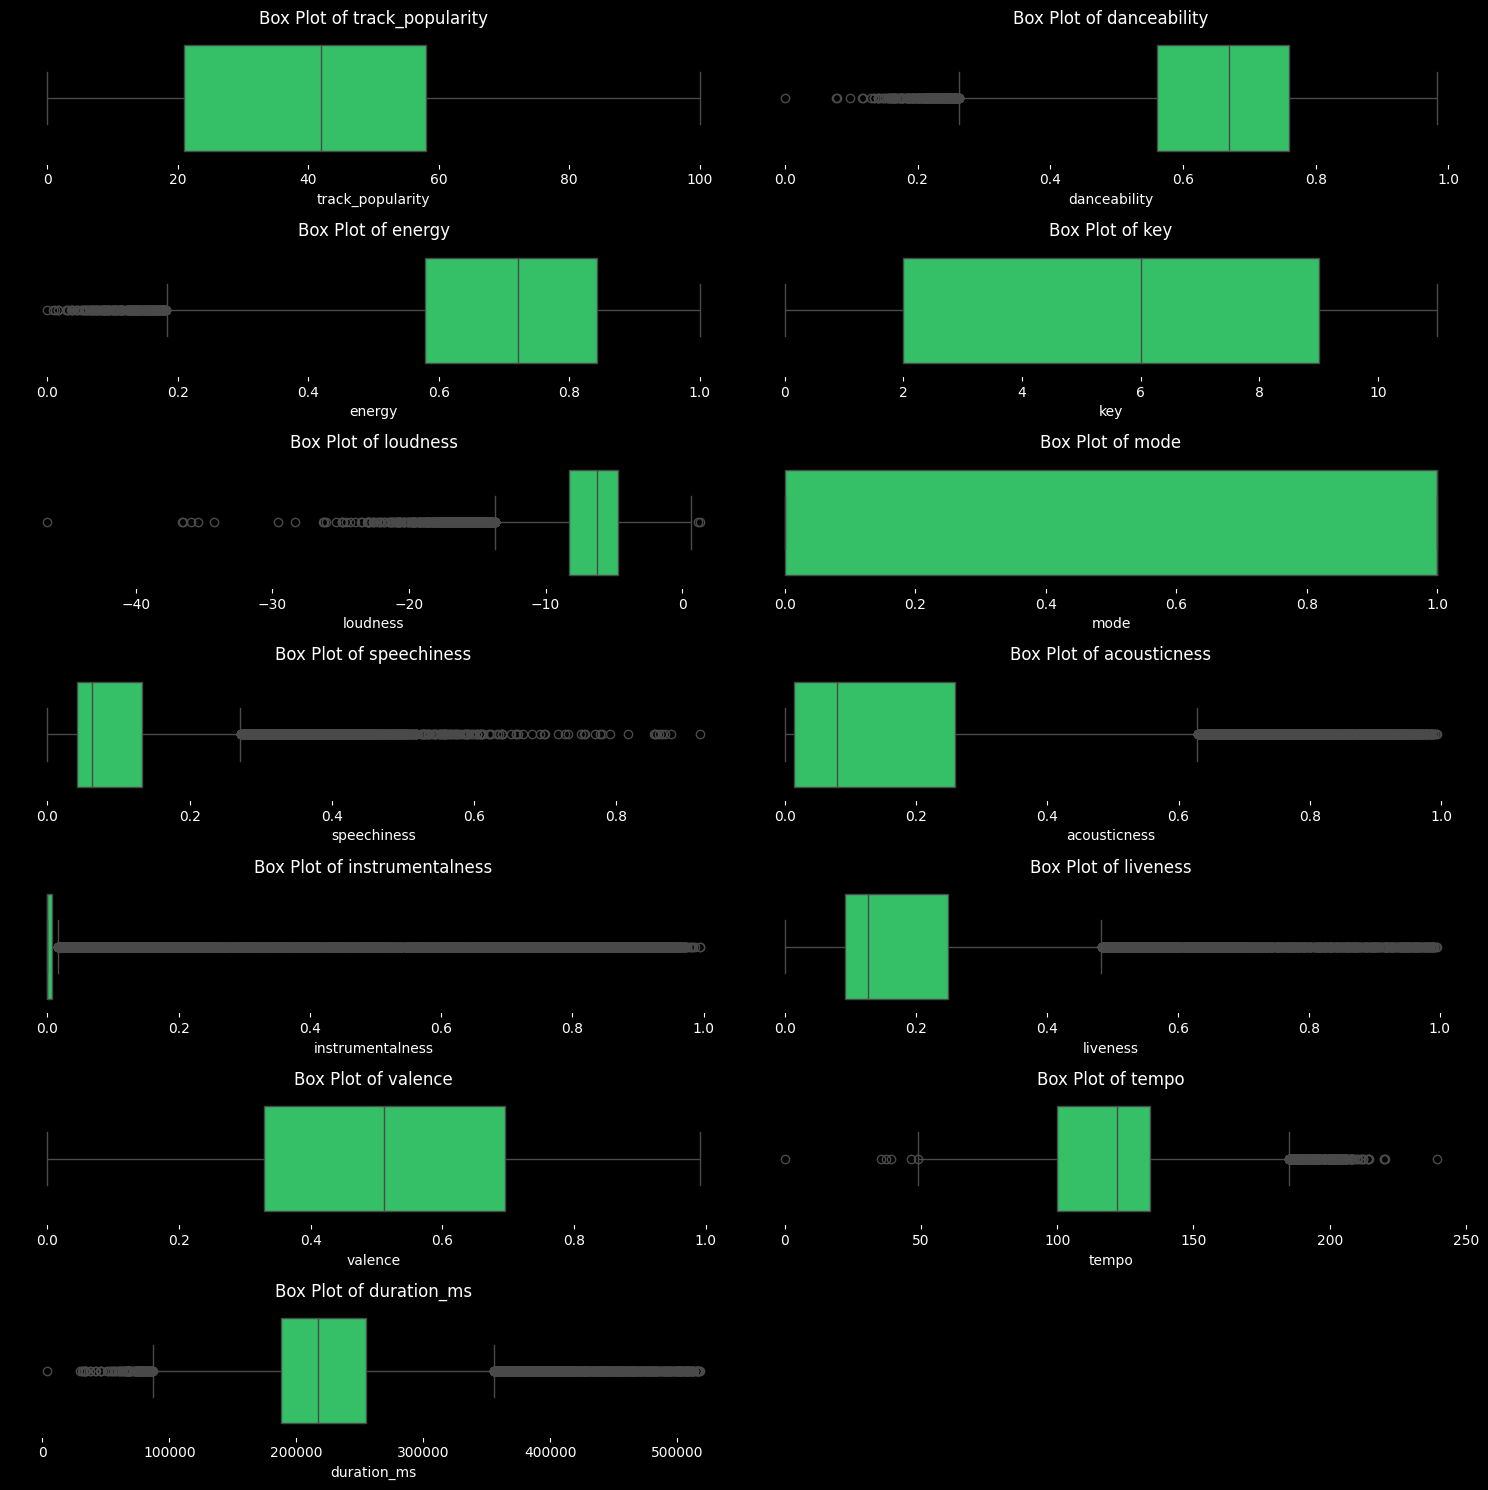

In [ ]:
# Define numerical_feature_lists
numerical_feature_list = ['track_popularity', 'danceability', 'energy', 'key',
                          'loudness', 'mode', 'speechiness', 'acousticness',
                          'instrumentalness', 'liveness', 'valence', 'tempo',
                          'duration_ms']

# Define the dimensions of the grid
num_plots = len(numerical_feature_list)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a grid of subplots with a black background
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.patch.set_facecolor('black')  # Set the background color to black

# Flatten the axes to iterate through
axes = axes.flatten()

for i, feature in enumerate(numerical_feature_list):
    sns.boxplot(data=df[feature], orient='h', color='#1ED760', ax=axes[i])  # Change box plot color
    axes[i].set_title(f'Box Plot of {feature}', color='white')  # Set title color to white
    axes[i].set_xlabel(feature, color='white')  # Set xlabel color to white

    # Set background color of subplots to black
    axes[i].set_facecolor('black')
    axes[i].tick_params(axis='x', colors='white')  # Set x-axis ticks color to white

# Hide any unused subplots
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Artist Popularity

In [ ]:
# Group by track_artist and calculate the total popularity for each artist
artist_genre_popularity = df1.groupby(['track_artist', 'playlist_genre'])['track_popularity'].sum().reset_index()

# total popularity for each artist across all genres
artist_total_popularity = artist_genre_popularity.groupby('track_artist')['track_popularity'].sum().reset_index()

# the top N artists for better visualization
top_n = 10
top_artists = artist_total_popularity.nlargest(top_n, 'track_popularity')

# an interactive bar chart with Plotly Express
fig = px.bar(top_artists, x='track_artist', y='track_popularity', color='track_artist',
             hover_data={'track_artist': False, 'track_popularity': True},
             labels={'track_artist': 'Artist', 'track_popularity': 'Total Popularity'},
             title='Top Artists by Total Track Popularity')

# Customize the layout
fig.update_traces(marker_color='#1ED760', hovertemplate='<b>%{x}</b><br>Popularity: %{y}<br>')
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_title=dict(text='Artist', font=dict(color='white')),
                  yaxis_title=dict(text='Total Popularity', font=dict(color='white')),
                  plot_bgcolor='black', paper_bgcolor='black',
                  hoverlabel=dict(bgcolor="white"),
                  title=dict(text='Top Artists by Total Track Popularity', font=dict(color='white'), x=0.5),
                  xaxis_tickfont=dict(color='white'), yaxis_tickfont=dict(color='white'),
                  legend=dict(font=dict(color='white')))

# Show the interactive plot
fig.show()


Top 10 Tracks per Playlist Genre

Popularity Trends of Genres by Release date

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# Group by track_album_release_date and playlist_genre while calculating the total popularity for each release date and genre
genre_popularity_by_date = df1.groupby(['track_album_release_date', 'playlist_genre'])['track_popularity'].sum().reset_index()

# Create a custom color palette with mellow colors
custom_palette = ['#FF00FF', '#00FFFF', '#FFFF00', '#FF69B4', '#00FF00', '#0000FF', '#FFA500', '#00FF7F']
# Create a line chart using Plotly Express to visualize popularity trends for all genres over release dates
fig = px.line(genre_popularity_by_date, x='track_album_release_date', y='track_popularity', color='playlist_genre',
              title="Popularity Trends of Genres by Release Date",
              labels={'track_album_release_date': 'Release Date', 'track_popularity': 'Total Popularity', 'playlist_genre': 'Genre'},
              color_discrete_sequence=custom_palette)  # Set custom colors for each genre

# Update layout for a black background and remove grid lines
fig.update_layout(
    plot_bgcolor='black',paper_bgcolor='black',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False),
    title=dict(text='Popularity Trends of Genres by Release Date', font=dict(color='white'), x=0.5),
    xaxis_title_font_color="white",
    yaxis_title_font_color="white",
    font_color="white"# Remove y-axis grid lines
)

# Show the interactive plot
fig.show()

In [ ]:
import plotly.express as px

# Group by track_album_release_date and playlist_genre while calculating the total popularity for each release date and genre
genre_popularity_by_date = df1.groupby(['track_album_release_date', 'playlist_genre'])['track_popularity'].sum().reset_index()

# Create a custom color palette with mellow colors
custom_palette = ['#FF00FF', '#00FFFF', '#FFFF00', '#FF69B4', '#00FF00', '#0000FF', '#FFA500', '#00FF7F']

# Define a custom color mapping dictionary for each genre
genre_color_mapping = {
    'Latin': custom_palette[0],
    'Pop': custom_palette[1],
    'Rock': custom_palette[2],
    'Hip Hop': custom_palette[3],
    'Electronic/Dance': custom_palette[4],
    'R&B': custom_palette[5],
    'Indie': custom_palette[6],
    'Country': custom_palette[7]
}

# Create a line chart using Plotly Express to visualize popularity trends for all genres over release dates
fig_line = px.line(genre_popularity_by_date, x='track_album_release_date', y='track_popularity', color='playlist_genre',
                   title="Popularity Trends of Genres by Release Date",
                   labels={'track_album_release_date': 'Release Date', 'track_popularity': 'Total Popularity', 'playlist_genre': 'Genre'},
                   color_discrete_map=genre_color_mapping)  # Use custom color mapping

# Update layout for a black background and remove grid lines
fig_line.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    title=dict(text='Popularity Trends of Genres by Release Date', font=dict(color='white'), x=0.5),
    xaxis_title_font_color="white",
    yaxis_title_font_color="white",
    font_color="white"
)

# Show the line chart
fig_line.show()

# Group by playlist_genre, track_album_name, and track_artist while calculating the total popularity for each
grouped_data = df1.groupby(['playlist_genre', 'track_album_name', 'track_artist'])['track_popularity'].sum().reset_index()

# Get the top 10 tracks for each playlist_genre
top_10_per_genre = grouped_data.groupby('playlist_genre').apply(lambda x: x.nlargest(10, 'track_popularity')).reset_index(drop=True)

# Create a Sunburst chart with Plotly Express for the top 10 tracks per playlist_genre
fig_sunburst = px.sunburst(top_10_per_genre, path=['playlist_genre', 'track_album_name', 'track_artist'], values='track_popularity',
                            title='Top 10 Tracks per Playlist Genre - Sunburst',
                            color='playlist_genre', color_discrete_map=genre_color_mapping)  # Use custom color mapping

# Increase the size of the Sunburst chart
fig_sunburst.update_layout(paper_bgcolor='black',width=800, height=800)

# Add boundaries between playlist_genre sections
fig_sunburst.update_traces(insidetextorientation='radial')  # Helps in separation

# Set the title and layout
fig_sunburst.update_layout(title=dict(font=dict(color='white')),
                           sunburstcolorway=["white"])

# Set the font color of the text labels to white
fig_sunburst.update_traces(textfont_color='black')

# Show the sunburst chart
fig_sunburst.show()


In [ ]:
import plotly.express as px

# Filter DataFrame for Latin genre
latin_data = df1[df1['playlist_genre'] == 'edm']

# Group by track_album_release_date and calculate the total popularity for each release date
latin_popularity_by_date = latin_data.groupby('track_album_release_date')['track_popularity'].sum().reset_index()

# Create a line plot using Plotly Express to visualize Latin music popularity over release dates
fig_latin = px.line(latin_popularity_by_date, x='track_album_release_date', y='track_popularity',
                    title="Popularity Trends of Latin Music by Release Date",
                    labels={'track_album_release_date': 'Release Date', 'track_popularity': 'Total Popularity'})

# Update layout for a black background and remove grid lines
fig_latin.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    title=dict(text='Popularity Trends of Latin Music by Release Date', font=dict(color='white'), x=0.5),
    xaxis_title_font_color="white",
    yaxis_title_font_color="white",
    font_color="white"
)

# Show the plot
fig_latin.show()


Based on the observations, Pop, Latin and rap remain the most popular genres based on track pularity in the recent years, with R&B following closely behind. However, Latin music has experienced a exponnetial rise in popularity recently, with its share of popularity exploding by a staggering 280% in the past 3 years. This unprecedented growth suggests that Latin music is not just on the heels of the current leaders, but poised to potentially challenge their dominance in the near future.

Genre versus Popularity

In [ ]:
# Assuming you have DataFrame df1 containing the necessary data

# Filter DataFrame for Latin genre
latin_data = df1[df1['playlist_genre'] == 'edm']

# Calculate total popularity for initial and later time periods
initial_popularity = latin_data[latin_data['track_album_release_date'] == '2017-01-04']['track_popularity'].sum()
later_popularity = latin_data[latin_data['track_album_release_date'] == '2020-01-01']['track_popularity'].sum()

# Calculate the percentage increase
percentage_increase = ((later_popularity - initial_popularity) / initial_popularity) * 100
print(percentage_increase)
#print("Percentage Increase in Latin Popularity:", percentage_increase)


inf


<ipython-input-12-91a877d93e42>:11: RuntimeWarning:

divide by zero encountered in scalar divide



In [ ]:
import pandas as pd

# Convert 'track_album_release_date' to datetime if it's not already
df1['track_album_release_date'] = pd.to_datetime(df1['track_album_release_date'])

# Filter DataFrame for Latin genre
latin_data = df1[df1['playlist_genre'] == 'latin']

# Group Latin data by month
latin_monthly = latin_data.groupby(pd.Grouper(key='track_album_release_date', freq='M'))['track_popularity'].sum()
print(latin_monthly)
# Define the start and end dates for the two periods
start_date = pd.to_datetime('2017-10-31')
end_date = pd.to_datetime('2019-11-30')

# Calculate the total popularity for each month in the start and end periods
total_popularity_start = latin_monthly.loc[start_date:end_date].sum()
total_popularity_end = latin_monthly.loc[end_date:].sum()

# Calculate the percentage increase
percentage_increase = ((total_popularity_end - total_popularity_start) / total_popularity_start) * 100

print("Percentage Increase in Latin Popularity:", percentage_increase)



track_album_release_date
1965-01-31       26
1965-02-28        0
1965-03-31        0
1965-04-30        0
1965-05-31        0
              ...  
2019-09-30     8607
2019-10-31    13578
2019-11-30    17153
2019-12-31    12478
2020-01-31     6575
Freq: M, Name: track_popularity, Length: 661, dtype: int64
Percentage Increase in Latin Popularity: -71.86878418697165


In [ ]:
import plotly.express as px

# Group data by 'playlist_genre' and count the number of unique 'track_id' for each genre
genre_track_count = df1.groupby('playlist_genre')['track_id'].nunique().reset_index(name='track_count')

# Create a custom color palette with mellow colors
custom_palette1 = ['#FF00FF', '#00FFFF', '#FFFF00', '#FF69B4', '#00FF00', '#0000FF', '#FFA500', '#00FF7F']

# Create a pie chart using Plotly Express to visualize the track count for each playlist genre
fig_pie = px.pie(genre_track_count, values='track_count', names='playlist_genre',
                 title='Track Count by Playlist Genre',
                 color='playlist_genre',
                 color_discrete_sequence=custom_palette)

# Update layout for a black background
fig_pie.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title=dict(font=dict(color='white'),x=0.5)
)

# Show the pie chart
fig_pie.show()


In [ ]:
import plotly.express as px

# Group data by 'playlist_genre' and count the number of unique 'track_id' for each genre
genre_track_count = df1.groupby('playlist_genre')['track_id'].nunique().reset_index(name='track_count')

# Create a custom color palette with mellow colors
custom_palette = ['#FF00FF', '#00FFFF', '#FFFF00', '#FF69B4', '#00FF00', '#0000FF', '#FFA500', '#00FF7F']

# Define a custom color mapping dictionary for each genre
genre_color_mapping = {
    'Latin': custom_palette[0],
    'Pop': custom_palette[1],
    'Rock': custom_palette[2],
    'Hip Hop': custom_palette[3],
    'Electronic/Dance': custom_palette[4],
    'R&B': custom_palette[5],
    'Indie': custom_palette[6],
    'Country': custom_palette[7]
}

# Create a pie chart using Plotly Express to visualize the track count for each playlist genre
fig_pie = px.pie(genre_track_count, values='track_count', names='playlist_genre',
                 title='Track Count by Playlist Genre',
                 color='playlist_genre',
                 color_discrete_map=genre_color_mapping)

# Update layout for a black background
fig_pie.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title=dict(font=dict(color='white'))
)

# Show the pie chart
fig_pie.show()


In [ ]:
import plotly.express as px

# Calculate average popularity by genre
average_popularity_by_genre = df1.groupby('playlist_genre')['track_popularity'].mean().reset_index()

# Create an interactive bar plot with Plotly
fig = px.bar(average_popularity_by_genre,
             x='playlist_genre',
             y='track_popularity',
             title='Average Track Popularity by Genre',
             labels={'track_popularity': 'Average Track Popularity'},
             color_discrete_sequence=['#1ED760'])

# Update layout for smaller size and black background, centering the title
fig.update_layout(width=800, height=400, plot_bgcolor='black', paper_bgcolor='black',
                  xaxis=dict(title='Genre', tickfont=dict(color='white'), title_font=dict(color='white'), showgrid=False),  # Changing x-axis label color to white and removing gridlines
                  yaxis=dict(title='Average Track Popularity', tickfont=dict(color='white'), title_font=dict(color='white'), showgrid=False),  # Changing y-axis label color to white and removing gridlines
                  font=dict(color='white'),  # Changing title label color to white
                  title=dict(x=0.5, xanchor='center'))  # Centering the title

# Update hover information - change font color to white and background to white
fig.update_traces(hoverinfo='text', hoverlabel=dict(bgcolor='white', font=dict(color='black')))

# Show the interactive plot
fig.show()

In [ ]:
import plotly.express as px

# Calculate average popularity by genre
average_popularity_by_genre = df1.groupby('playlist_genre')['track_popularity'].mean().reset_index()

# Sort the DataFrame by 'track_popularity' in descending order
average_popularity_by_genre = average_popularity_by_genre.sort_values(by='track_popularity', ascending=False)

# Create an interactive bar plot with Plotly
fig = px.bar(average_popularity_by_genre,
             x='playlist_genre',
             y='track_popularity',
             title='Average Track Popularity by Genre',
             labels={'track_popularity': 'Average Track Popularity'},
             color_discrete_sequence=['#1ED760'])

# Update layout for smaller size and black background, centering the title
fig.update_layout(width=800, height=400, plot_bgcolor='black', paper_bgcolor='black',
                  xaxis=dict(title='Genre', tickfont=dict(color='white'), title_font=dict(color='white'), showgrid=False),  # Changing x-axis label color to white and removing gridlines
                  yaxis=dict(title='Average Track Popularity', tickfont=dict(color='white'), title_font=dict(color='white'), showgrid=False),  # Changing y-axis label color to white and removing gridlines
                  font=dict(color='white'),  # Changing title label color to white
                  title=dict(x=0.5, xanchor='center'))  # Centering the title

# Update hover information - change font color to white and background to white
fig.update_traces(hoverinfo='text', hoverlabel=dict(bgcolor='white', font=dict(color='black')))

# Show the interactive plot
fig.show()


Numerical Feature Correlation Matrix

In [ ]:
import plotly.graph_objects as go

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define  color scheme
colors = [
    [0.0, 'rgb(253, 253, 204)'],
    [0.2, 'rgb(201, 235, 177)'],
    [0.4, 'rgb(145, 216, 163)'],
    [0.6, 'rgb(69, 181, 157)'],
    [0.8, 'rgb(28, 107, 160)'],
    [1.0, 'rgb(39, 14, 53)']
]

# Create an interactive heatmap with Plotly Express
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                x=correlation_matrix.index,
                                y=correlation_matrix.columns,
                                colorscale=colors,
                                colorbar=dict(title='Correlation', tickfont=dict(color='white')),
                                zmin=-1, zmax=1))

# Update layout for the plot
fig.update_layout(
    title=dict(text='Interactive Correlation Heatmap', x=0.5),  # Center the title
    xaxis=dict(tickfont=dict(color='white')),
    yaxis=dict(tickfont=dict(color='white')),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
)

# Show the interactive plot
fig.show()


<ipython-input-17-b0d044648c2c>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Normalized correlation of features with popularity

In [ ]:
import plotly.express as px

# numerical features correlation values with popularity
corr_popularity = df.corrwith(df['track_popularity'], numeric_only=True)

# removing pop-pop 1.0 correlation
a = corr_popularity.tail(corr_popularity.shape[0]-1)
a = a.tolist()

# creating dataframe
corr = pd.DataFrame()
corr["features"] = ['danceability', 'energy', 'key',
                          'loudness', 'mode', 'speechiness', 'acousticness',
                          'instrumentalness', 'liveness', 'valence', 'tempo',
                          'duration_ms']
corr['values'] = a

# Normalizing values
norm_values = []
for i in range(len(corr['values'])):
    a = (corr['values'][i]-corr['values'].min())/(corr['values'].max()-corr['values'].min()) * 100
    norm_values.append(a)
corr['norm_values'] = norm_values
df_corr = corr.drop(columns=['values'])

# Sort the DataFrame by 'norm_values' column in descending order
df_corr_sorted = df_corr.sort_values(by='norm_values', ascending=False)

# Create an interactive bar plot with Plotly
fig = px.bar(df_corr_sorted,
             x='features',
             y='norm_values',
             title='Normalized correlation of features with popularity',
             color_discrete_sequence=['#1ED760'])

# Update layout for smaller size and black background, centering the title
fig.update_layout(width=800, height=400, plot_bgcolor='black', paper_bgcolor='black',
                  xaxis=dict(title='Numerical Feature', tickfont=dict(color='white'), title_font=dict(color='white'), showgrid=False),  # Changing x-axis label color to white and removing gridlines
                  yaxis=dict(title='Correlation value', tickfont=dict(color='white'), title_font=dict(color='white'), showgrid=False),  # Changing y-axis label color to white and removing gridlines
                  font=dict(color='white'),  # Changing title label color to white
                  title=dict(x=0.5, xanchor='center'))  # Centering the title

# Update hover information - change font color to white and background to white
fig.update_traces(hoverinfo='text', hoverlabel=dict(bgcolor='white', font=dict(color='black')))

# Show the interactive plot
fig.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the necessary data
# Split the data into treatment (acousticness) and outcome (track_popularity) variables
X = df[['acousticness']]  # Treatment variable
y = df['track_popularity']  # Outcome variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a propensity score model (e.g., logistic regression) to predict treatment assignment
propensity_model = LogisticRegression()
propensity_model.fit(X_train, y_train)

# Predict propensity scores for the test set
propensity_scores = propensity_model.predict_proba(X_test)[:, 1]

# Apply propensity score matching
# Here, we'll use simple nearest neighbor matching
matched_indices = []
for idx, score in enumerate(propensity_scores):
    closest_idx = min(range(len(propensity_scores)), key=lambda i: abs(propensity_scores[i] - score))
    matched_indices.append(closest_idx)

# Select the matched samples
matched_X = X_test.iloc[matched_indices]
matched_y = y_test.iloc[matched_indices]

# Now, you can perform your analysis on the matched data to estimate the causal effect
# For example, you could fit a regression model to estimate the treatment effect on the outcome variable

# Fit a regression model to estimate the causal effect
# Here, you can use any regression model appropriate for your data
from sklearn.linear_model import LinearRegression
causal_model = LinearRegression()
causal_model.fit(matched_X, matched_y)

# Obtain the coefficient of the acousticness variable
causal_effect = causal_model.coef_[0]
print("Estimated Causal Effect of Acousticness on Track Popularity:", causal_effect)


Estimated Causal Effect of Acousticness on Track Popularity: 7.976760515032139


Average Danceability, Acoustiness, and Loudness per Genre

In [ ]:
# Group by playlist_genre and calculate the mean danceability, acousticness, and loudness for each genre
genre_stats = df1.groupby('playlist_genre')[['danceability', 'acousticness', 'loudness']].mean().reset_index()

# Melt the DataFrame for easy plotting
genre_stats_melted = genre_stats.melt(id_vars='playlist_genre', var_name='Attribute', value_name='Value')

# Define a triadic color palette
triadic_palette = ['#FF6B6B', '#6BFF6B', '#6B6BFF']  # Example triadic colors

# Create a grouped bar chart using Plotly Express with the triadic color palette
fig = px.bar(genre_stats_melted, x='playlist_genre', y='Value', color='Attribute',
             barmode='group', labels={'playlist_genre': 'Playlist Genre', 'Value': 'Value'},
             title='Average Danceability, Acousticness, and Loudness per Genre',
             color_discrete_sequence=triadic_palette)  # Apply the triadic color palette

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Group by playlist_genre and calculate the mean danceability, acousticness, and loudness for each genre
genre_stats = df1.groupby('playlist_genre')[['danceability', 'acousticness', 'loudness']].mean().reset_index()

# Melt the DataFrame for easy plotting
genre_stats_melted = genre_stats.melt(id_vars='playlist_genre', var_name='Attribute', value_name='Value')

# Sort the melted DataFrame by loudness
genre_stats_melted = genre_stats_melted.sort_values(by='Value', ascending=True)

# Define neon color palette
neon_palette = ['#1ED760', '#FF6EC7', '#04FBF7']

# Create a grouped bar chart using Plotly Express with the neon color palette
fig = px.bar(genre_stats_melted, x='playlist_genre', y='Value', color='Attribute',
             barmode='group', labels={'playlist_genre': 'Playlist Genre', 'Value': 'Value'},
             title='Average Danceability, Acousticness, and Loudness per Genre',
             color_discrete_sequence=neon_palette)  # Apply the neon color palette

# Update layout for black background
fig.update_layout(
    plot_bgcolor='black',  # Set plot background color to black
    paper_bgcolor='black',  # Set paper background color to black
    font=dict(color='white'),
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False),# Set font color to white
    title=dict(text='Average Danceability, Acousticness, and Loudness per Genre', x=0.5)
)

# Show the interactive plot
fig.show()


In [ ]:
print(df.columns)

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np

# Assuming 'spotify_data' is your DataFrame with columns including 'playlist_genre' as the target variable
# Assuming 'features' and 'target_column' are defined

# Selecting columns for features and target variable
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']
target_column = 'playlist_genre'

# Creating feature set and target variable
X = df2[features]
y = df2[target_column]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter distributions
param_dist = {
    'max_depth': [None] + list(np.arange(10, 31, 5)),
    'min_samples_split': [2, 5, 10, 15],
    # Add more parameters to tune
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Use the best estimator for prediction and evaluation
y_pred = best_estimator.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy with Best Estimator:", accuracy)

Best Parameters: {'min_samples_split': 15, 'max_depth': 10}
Accuracy with Best Estimator: 0.4731231917161565


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.5609867519415258


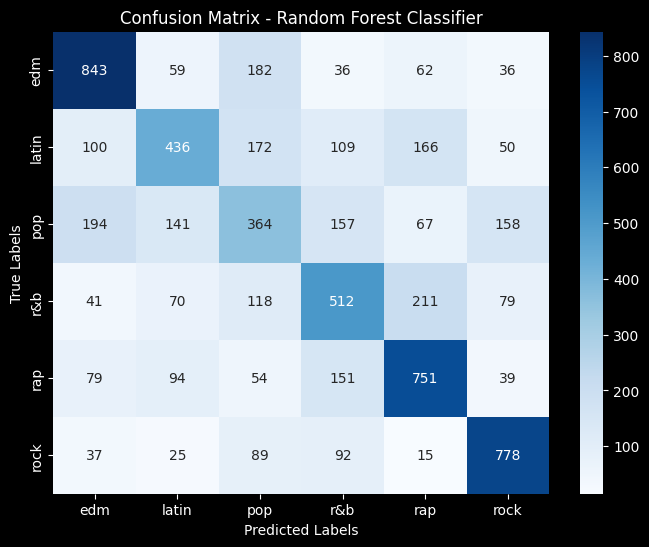

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to dark
plt.style.use('dark_background')

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [ ]:
# Inspect unique genre labels in the target column
unique_labels = y.unique()
print("Unique Genre Labels:", unique_labels)

# Create a mapping between class indices and genre labels
class_label_mapping = {i: label for i, label in enumerate(unique_labels)}
print("Class Label Mapping:", class_label_mapping)


Unique Genre Labels: ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
Class Label Mapping: {0: 'pop', 1: 'rap', 2: 'rock', 3: 'latin', 4: 'r&b', 5: 'edm'}


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from xgboost import XGBClassifier
# from sklearn import metrics
# from sklearn.preprocessing import LabelEncoder
# import re

# # Data cleaning: Removing non-alphanumeric characters from 'playlist_genre' column
# df3['playlist_genre'] = df3['playlist_genre'].apply(lambda x: re.sub(r'\W+', '', str(x)))

# # Assuming 'features' and 'target_column' are defined
# features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#             'duration_ms']
# target_column = 'playlist_genre'

# # Creating feature set and target variable
# X1 = df3[features]
# y1 = df3[target_column]

# # Encoding the target variable
# label_encoder = LabelEncoder()
# y_encoded1 = label_encoder.fit_transform(y1)

# # Splitting the data into training and testing sets
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_encoded1, test_size=0.2, random_state=42)

# # Define the hyperparameters and values to test
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.1, 0.01, 0.001],
#     # Add more parameters to tune
# }

# # Create a GridSearchCV instance for XGBoost
# grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_xgb.fit(X_train1, y_train1)

# # Get the best parameters and best estimator for XGBoost
# best_params_xgb = grid_search_xgb.best_params_
# best_estimator_xgb = grid_search_xgb.best_estimator_

# # Use the best estimator for prediction and evaluation
# y_pred_best_xgb = best_estimator_xgb.predict(X_test1)
# accuracy_best_xgb = metrics.accuracy_score(y_test1, y_pred_best_xgb)

# print("Best Parameters for XGBoost:", best_params_xgb)
# print("Accuracy with Best XGBoost Estimator:", accuracy_best_xgb)

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Accuracy with Best XGBoost Estimator: 0.5550479671082686


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
import shap


In [ ]:
explainer = shap.Explainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

In [ ]:
import matplotlib.pyplot as plt
import shap

# Set the style to dark
plt.style.use('dark_background')

# Assuming you have already defined shap_values and X_test
shap.summary_plot(shap_values, X_test)

# Show the plot
plt.show()

NameError: name 'shap_values' is not defined

In [ ]:
Unique Genre Labels: ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
Class Label Mapping: {0: 'pop', 1: 'rap', 2: 'rock', 3: 'latin', 4: 'r&b', 5: 'edm'}

In [ ]:
shap.summary_plot(shap_values[1], X_test)

NameError: name 'shap' is not defined